In [50]:
#Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
#Importing the csv files into dataframes (both train and test)

dftrain = pd.read_csv("/content/drive/MyDrive/WOC/Polynomial_train.csv", header = [0])
del dftrain['Unnamed: 0']
dftest = pd.read_csv("/content/drive/MyDrive/WOC/Polynomial_test.csv", header = [0])
del dftest['Unnamed: 0']

In [52]:
#Functions

def importing(dataframe):
    X = dataframe.iloc[:,1:].transpose() #784x4000
    features = X.shape[0]
    examples = X.shape[1]
    Y = dataframe.iloc[:,0].to_numpy()
    return X, Y, features, examples

Xtrain, Ytrain, trainfeatures, trainexamples = importing(dftrain)
Xtest, Ytest, testfeatures, testexamples = importing(dftest)

def standardization(X):
  features = X.shape[0]
  for i in range(1,features):
    rowmin = X.iloc[i,:].min()
    rowmean = X.iloc[i,:].mean()
    rowstd = X.iloc[i,:].std()
    X.iloc[i,:] -= rowmin
    X.iloc[i,:] -= rowmean
    X.iloc[i,:] /= rowstd
  return X.to_numpy()

Xtrain = standardization(Xtrain)
Xtest = standardization(Xtest)

#Appending row with all ones and polynomial features to Xtrai

def polynomialfeatures(X, examples):
  quadraticfeatures = []
  cubicfeatures = []
  Xones = np.ones((1,examples))
  for i in range(3):
    for j in range(i, 3):
        temparrayquad = np.multiply(X[i,:], X[j,:])
        quadraticfeatures.append(temparrayquad)
  for i in range(3):
    for j in range(i,3):
        for k in range(j,3):
            temparraycubic1 = np.multiply(X[i,:], X[j,:])
            temparraycubic = np.multiply(temparraycubic1, X[k,:])
            cubicfeatures.append(temparraycubic)
  X = pd.DataFrame(np.concatenate([Xones, X, quadraticfeatures, cubicfeatures])) 
  features = len(X) - 1
  return X, features

Xtrain, trainfeatures = polynomialfeatures(Xtrain, trainexamples)
Xtest, testfeatures = polynomialfeatures(Xtest, testexamples)


In [53]:
#Applying polynomial regression on the dataset

X_linear = Xtrain.iloc[:4,:].to_numpy()
X_quadratic = Xtrain.iloc[:10,:].to_numpy()
X_cubic = Xtrain.to_numpy()

Y = Ytrain.reshape(trainexamples, 1)

theta_linear = np.zeros((4, 1))
theta_quadratic = np.zeros((10, 1))
theta_cubic = np.zeros((20, 1))

iteration_linear = 20000
learningrate_linear = 0.00001

iteration_quadratic = 20000
learningrate_quadratic = 0.0001

iteration_cubic = 5000
learningrate_cubic = 0.000012

def model(X, Y, theta, learningrate, iteration):
    costlist = []
    for i in range(iteration):
        y_pred = np.dot(X.T, theta)
        cost = (1/(2*trainexamples))*(np.sum(np.square(y_pred - Y)))
        pdcost = (1/trainexamples)*np.dot(X, y_pred - Y)
        temptheta = theta - learningrate*pdcost
        theta = temptheta
        costlist.append(cost)
    return theta, y_pred, costlist

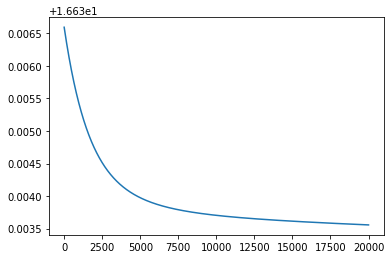

In [54]:
#Extracting theta, prediction and cost, and plotting the cost versus iterations graph

theta_linear, y_pred_linear, costlist_linear = model(X_linear, Y, theta_linear, learningrate_linear, iteration_linear)
plt.plot([i for i in range(iteration_linear)], costlist_linear)
plt.show()

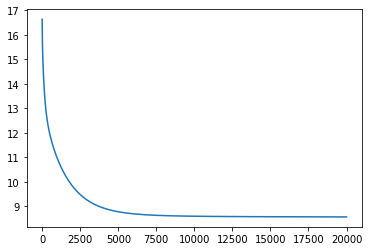

In [55]:
#Extracting theta, prediction and cost, and plotting the cost versus iterations graph

theta_quadratic, y_pred_quadratic, costlist_quadratic = model(X_quadratic, Y, theta_quadratic, learningrate_quadratic, iteration_quadratic)
plt.plot([i for i in range(iteration_quadratic)], costlist_quadratic)
plt.show()

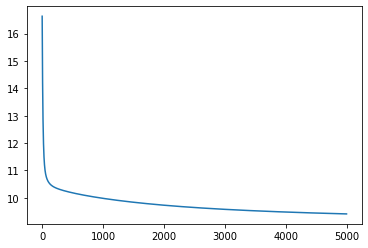

In [56]:
#Extracting theta, prediction and cost, and plotting the cost versus iterations graph

theta_cubic, y_pred_cubic, costlist_cubic = model(X_cubic, Y, theta_cubic, learningrate_cubic, iteration_cubic)
plt.plot([i for i in range(iteration_cubic)], costlist_cubic)
plt.show()

In [57]:
#Using the theta on Xtest for all the 3 cases

X_test = Xtest.to_numpy()

Ypredfinal_linear = np.dot(X_test[:4,].T, theta_linear)
Ypredfinal_quadratic = np.dot(X_test[:10,].T, theta_quadratic)
Ypredfinal_cubic = np.dot(X_test.T, theta_cubic)

In [58]:
#Finding the error

Yfinal = Ytest.reshape(testexamples, 1)

rmserror_linear = np.sqrt((np.sum(np.square(Yfinal - Ypredfinal_linear)))/testexamples)
rmserror_quadratic = np.sqrt((np.sum(np.square(Yfinal - Ypredfinal_quadratic)))/testexamples)
rmserror_cubic = np.sqrt((np.sum(np.square(Yfinal - Ypredfinal_cubic)))/testexamples)

print(rmserror_linear)
print(rmserror_quadratic)
print(rmserror_cubic)

5.769233409555011
4.158575950667938
4.3593333071132845
